
# Lending Club Credit Risk EDA (Starter Notebook)

**What this does:** quick, recruiter-friendly analysis of Lending Club loan data with SQL‑style summaries and simple charts.

**How to use:**
1. Download a Lending Club CSV (e.g., `accepted_2007_to_2018Q4.csv` from Kaggle) and place it in the **same folder** as this notebook.
2. Rename it to **`loans.csv`** or update `DATA_PATH` below.
3. Run each cell in order.

**Views included:**
- Default rate by **FICO band**
- Default rate by **grade** (A–G)
- Default rate by **term** (36 vs 60 months)

> Tip: If the original file is `.csv.gz`, pandas can read it directly—no need to unzip.


# Credit Risk EDA (Lending Club)

**Quick Takeaways**
- Defaults drop from **25.3%** at **FICO 660–679** to **7.1%** at **780+**.
- Lower grades (**E–G**) run about **3.8×** the default rate of **A/B** (**40.9%** vs **10.6%**).
- **60-month** loans default more than **36-month** (**32.5%** vs **16.0%**).

**How to run**
- Set `DATA_PATH` in the code cell to your file path (e.g., `/content/drive/MyDrive/loans.csv` or `/content/loans_sample.csv`).
- Run the single code cell below (top → bottom). Charts and tables will render inline.
- If the full file is large, use the built-in sampler to create a smaller `loans_sample.csv`.
- Requirements: `pandas`, `matplotlib`, `jupyter`.

,fico_band,default_rate_%
0,660–679,25.286296
1,680–699,21.439108
2,700–719,17.285174
3,720–739,13.799066
4,740–759,11.157630
5,760–779,9.534523
6,780+,7.105764


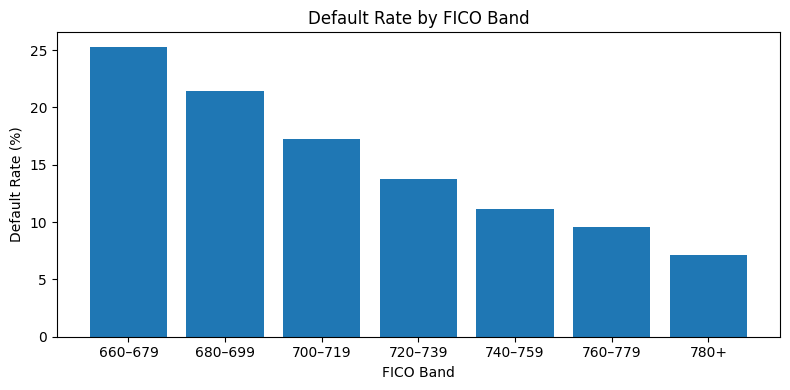

In [7]:
# Re-bin FICO to 660+ and rebuild agg_fico (drops empty bands)
bins   = [660, 680, 700, 720, 740, 760, 780, 851]
labels = ["660–679","680–699","700–719","720–739","740–759","760–779","780+"]

df["fico_band"] = pd.cut(df["fico_mid"], bins=bins, labels=labels, right=False)

agg_fico = (
    df[df["fico_band"].notna()]
      .groupby("fico_band", observed=True)["default"]
      .mean().mul(100).rename("default_rate_%").reset_index()
)
display(agg_fico)

# (optional) re-plot the FICO chart with the cleaned bands
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(agg_fico["fico_band"].astype(str), agg_fico["default_rate_%"])
plt.title("Default Rate by FICO Band"); plt.xlabel("FICO Band"); plt.ylabel("Default Rate (%)")
plt.tight_layout(); plt.show()